In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset:  listings.csv

Source: Inside Airbnb

Description: Detailed Listings data for New Orleans (as of March 2019)

Key Variables/Columns

price: 15 - 8000
review_scores_rating: 20-100 (dropping nan/blank)


In [64]:
# Read the csv file into a pandas DataFrame
lst = pd.read_csv('../Resources/listings.csv')
lst = lst[['price', 'review_scores_rating']]
lst = lst.dropna(axis=0, how="any")
lst.head()

,price,review_scores_rating
0,$300.00,97.0
1,$100.00,98.0
2,$125.00,99.0
3,$115.00,98.0
4,$50.00,95.0


In [65]:
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,'')
lst['price']=lst.price.map(lambda x: locale.atof(x.strip('$')))
lst.head()

,price,review_scores_rating
0,300.0,97.0
1,100.0,98.0
2,125.0,99.0
3,115.0,98.0
4,50.0,95.0


In [66]:
lst.reset_index(drop=True)
lst.count()

price                   5984
review_scores_rating    5984
dtype: int64

In [67]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = lst.price.values.reshape(-1, 1)
y = lst.review_scores_rating.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (5984, 1) (5984, 1)


array([[300.],
       [100.],
       [125.],
       ...,
       [149.],
       [185.],
       [ 70.]])

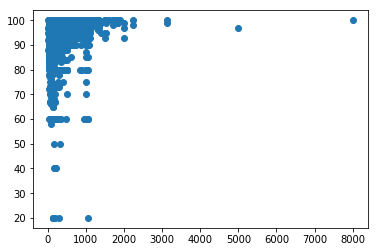

In [68]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [69]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [70]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[0.00128675]]
y-axis intercept:  [95.5009447]


In [72]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[15.]]
Max X Value: [[8000.]]


In [73]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

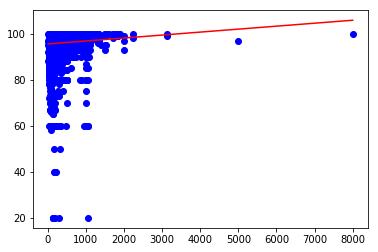

In [74]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 37.43916468465706
R-squared (R2): 0.0028891752208768384


Recall:
 - A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
 - R^2 (coefficient of determination) regression score function.
     - Best possible score is 1.0 and it can be negative 
     - A constant model that always predicts the expected value of y, disregarding the input features, would get R^2 score 0.0.

In [76]:
# Overall Score for the model
model.score(X, y)

0.0028891752208768384

## Dataset:  listings.csv

Key Variables/Columns

accommodates: 1-16
bathrooms: 0.5-14.5 (drop nan/blanks; drop/correct 54.5) 
bedrooms: 0-10 (drop nan/blanks)
?square_feet: 0-3600 (drop nan/blank)

In [78]:
mlr = pd.read_csv('../Resources/listings.csv')
mlr = mlr[['accommodates', 'bathrooms', 'bedrooms']]
mlr = mlr.dropna(axis=0, how="any")
mlr.head()

,accommodates,bathrooms,bedrooms
0,4,2.0,3.0
1,3,1.0,1.0
2,2,1.0,1.0
3,2,2.0,1.0
4,2,1.0,1.0


In [79]:
mlr.count()

accommodates    6629
bathrooms       6629
bedrooms        6629
dtype: int64

In [80]:
X = mlr[["bathrooms", "bedrooms"]]
y = mlr["accommodates"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6629, 2) (6629, 1)


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [83]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7019496391208381
Testing Score: 0.7257015312339902


Text(0.5, 1.0, 'Residual Plot')

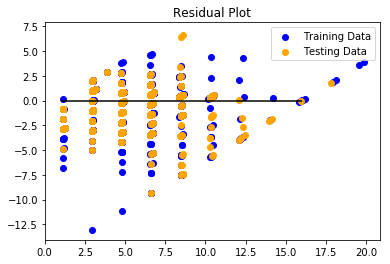

In [84]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")